In [1]:
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense

import seaborn as sns

C:\Users\BATCOMP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We will use "shot_logs.csv" as our dataset for analysis and prediction.

In [2]:
nba = pd.read_csv(r"C:\Users\BATCOMP\Downloads\nba-shot-logs\shot_logs.csv")

In [4]:
nba.head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [5]:
number = LabelEncoder()

Let's convert categorical text to numbers using LabelEncoder.

In [6]:
nba['W'] = number.fit_transform(nba['W'].astype('str'))
nba['LOCATION'] = number.fit_transform(nba['LOCATION'].astype('str'))
nba['SHOT_RESULT']=number.fit_transform(nba['SHOT_RESULT'].astype('str'))

Check if the dataset contains any null values. 

If there are any missing values, let's fill them up later.

In [7]:
nba.isnull().any()

GAME_ID                       False
MATCHUP                       False
LOCATION                      False
W                             False
FINAL_MARGIN                  False
SHOT_NUMBER                   False
PERIOD                        False
GAME_CLOCK                    False
SHOT_CLOCK                     True
DRIBBLES                      False
TOUCH_TIME                    False
SHOT_DIST                     False
PTS_TYPE                      False
SHOT_RESULT                   False
CLOSEST_DEFENDER              False
CLOSEST_DEFENDER_PLAYER_ID    False
CLOSE_DEF_DIST                False
FGM                           False
PTS                           False
player_name                   False
player_id                     False
dtype: bool

'SHOT_CLOCK' has missing values.

We are going to try and predict the type of shot to be played (either 2 or 3).

There is a feature called 'W' and 'LOCATION'. 

'W' has two categories, W(win) = 1 and L(lose) = 0. 

'LOCATION' has two categories, A(away) = 0 and H(home) = 1.


Lets's first check, in 'LOCATION', the number of 2 and 3 pointers played when at home(1) and when away(0).

In [8]:
away = nba[nba['LOCATION']==0].PTS_TYPE.value_counts()
away

2    47302
3    16833
Name: PTS_TYPE, dtype: int64

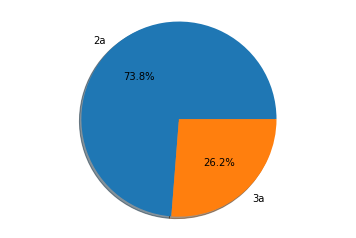

In [9]:
plt.pie(away,labels=['2a','3a'],autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

73.8% of the shots played while away are 2 pointers and 26.2% of the shots played are are 3 pointers.

In [10]:
home = nba[nba['LOCATION']==1].PTS_TYPE.value_counts()
home

2    46871
3    17063
Name: PTS_TYPE, dtype: int64

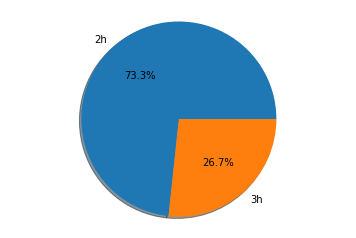

In [11]:
plt.pie(home,labels=['2h','3h'],autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

73.3% of the shots played in home ground are 2 pointers and 26.7% of the shots played are 3 pointers.

From the two pie charts for 'LOCATION' we can infer that there isn't a lot of difference for the type of shot to be played.


Hence, we can drop this feature from our dataset.

Now, let's try to see the number of shot types played when won or lost and compare the two.  

In [12]:
win=nba[nba['W']==1].PTS_TYPE.value_counts()
win

2    47107
3    17488
Name: PTS_TYPE, dtype: int64

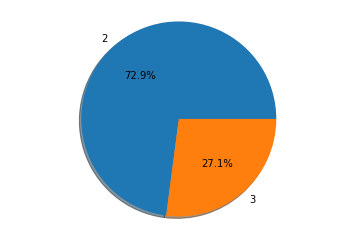

In [13]:
plt.pie(win,labels=['2','3'],autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

72.9% of the shots played when won a match were 2 pointers and 27.1% are 3 pointers.

In [14]:
lose = nba[nba['W']==0].PTS_TYPE.value_counts()
lose

2    47066
3    16408
Name: PTS_TYPE, dtype: int64

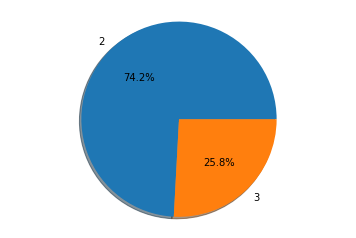

In [15]:
plt.pie(lose,labels=['2','3'],autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

74.2% of the shots when lost a match were 2 pointers and 26.8% were 3 pointers.

From the two pie charts for 'W' we can infer that there isn't a lot of difference for the type of shot to be played.

Hence, we can drop this feature.


Let's check the effect of 'FINAL_MARGIN' on our target, 'PTS_TYPE' using lineplot from seaborn.

In [16]:
correl = nba.corr('pearson')
abs(correl['PTS_TYPE']).sort_values()

SHOT_NUMBER                   0.003054
GAME_ID                       0.003418
LOCATION                      0.005012
CLOSEST_DEFENDER_PLAYER_ID    0.006266
player_id                     0.010486
W                             0.013865
FINAL_MARGIN                  0.024134
PTS                           0.030361
SHOT_CLOCK                    0.032809
PERIOD                        0.048915
SHOT_RESULT                   0.121293
FGM                           0.121293
DRIBBLES                      0.169016
TOUCH_TIME                    0.181007
CLOSE_DEF_DIST                0.414198
SHOT_DIST                     0.740933
PTS_TYPE                      1.000000
Name: PTS_TYPE, dtype: float64

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


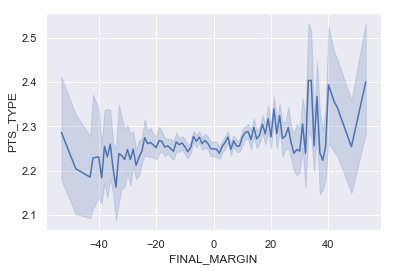

In [17]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='FINAL_MARGIN',y='PTS_TYPE',data=nba)

As the final margin increases, the type of shot played slowly moves from a 2 pointer to a 3 pointer, which will effect the target.

Let's check the effect of shot number on the target using seaborn's line plot.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


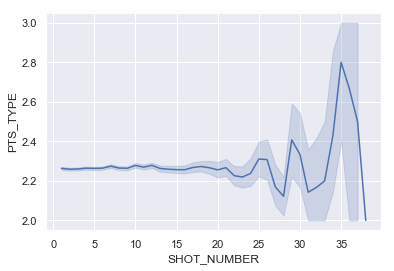

In [18]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='SHOT_NUMBER',y='PTS_TYPE',data=nba)

As the shot number increases, type of shot played moves from 2 pointers to 3 pointers, which will effect the target

Let's check the effect of game period on the target.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


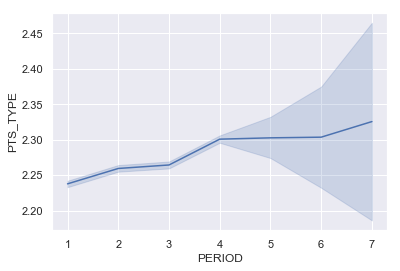

In [19]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='PERIOD',y='PTS_TYPE',data=nba)

Looks like as period increases, the type of shot played slowly moves from 2 pointers to 3.

Let's check the effect of number of dribbles on the type of shot played.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


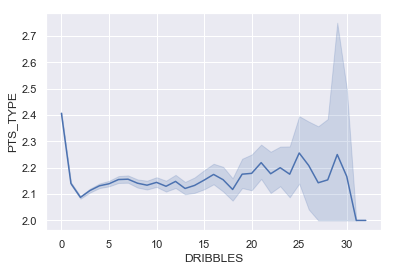

In [20]:
sns.set(style='darkgrid')
sns.lineplot(x='DRIBBLES',y='PTS_TYPE',data=nba)

Lower number of dribbles have higher chances of shooting a 3 pointer, whereas higher number of dribbles have higher chances of shooting a 2 pointer.

Let's check the effect of ball touch time on the type of shot played.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


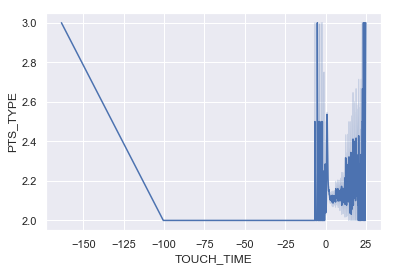

In [21]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='TOUCH_TIME',y='PTS_TYPE',data=nba)

Lower touch time have more chances of being a 3 pointer which increases again for higher touch time.

Let's check the effect of shot distance on the type of shot played.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


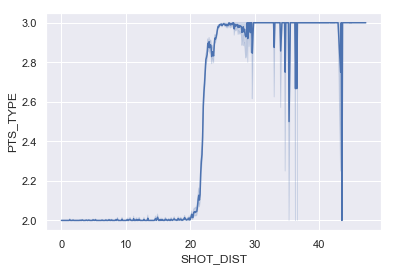

In [22]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='SHOT_DIST',y='PTS_TYPE',data=nba)

Shot distance and the type of shot played have a direct correlation, i.e if the shot distance is known already there is no need to predict the type of shot played. If the shhot distance is anywhere above 22 or 23 feet it is definitely going to be a 3 pointer and if it is below 22 or 23 feet, it is definitely going to be a 2 pointer.

Hence, it is best to drop this feature.

Let's check the effect of the shot result on the target.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


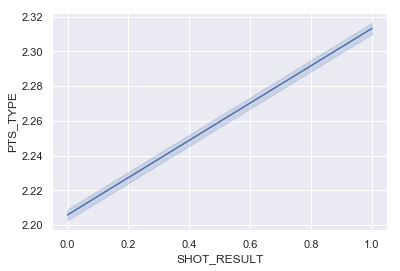

In [23]:
sns.set(style='darkgrid')
sns.lineplot(x='SHOT_RESULT',y='PTS_TYPE',data=nba)

It is a linear relationship.

As the chances of not making the basket increases, the chances of the shot being a 3 pointer increases.

Let's check what effect the distance of the closest defender would have on the target.  

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


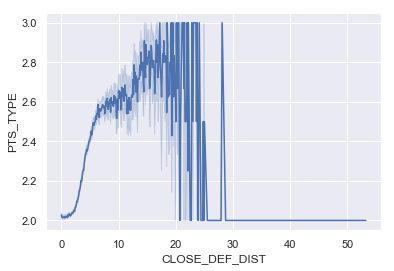

In [24]:
sns.set(style='darkgrid')
sns.lineplot(x='CLOSE_DEF_DIST', y='PTS_TYPE',data=nba)

Closer the defender, higher chances the shot being a 3 pointer.

The feature 'GAME_CLOCK' is in terms of minutes and seconds. We will not be able to do any mathematical functions on it.

So let's try to convert it all to seconds.

In [25]:
game_clock=np.array(nba['GAME_CLOCK'])

In [26]:
game_clock

array(['1:09', '0:14', '0:00', ..., '11:10', '2:37', '0:12'], dtype=object)

Create a new list and append all the 'GAME_CLOCK' values, in terms of seconds, into this new list.

In [27]:
list=[]
for i in game_clock:
    x=i.split(':')
    new=int(x[0])*60 + int(x[1])
    list.append(new)

Create a new column and add that list into the column.

In [28]:
nba['GAMECLOCK']=list

Let's check what effect this new feature, 'GAMECLOCK which has all 'GAME_CLOCK' values in seconds, has on the target.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


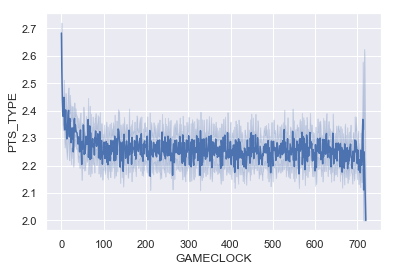

In [29]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='GAMECLOCK',y='PTS_TYPE',data=nba)

Looks like the chances of type of shot played increases to 2 pointers from 3 pointers as time increases.

Let's drop the unwanted features as seen from above.

We'll drop 'FGM' beacause it is a result of shot result. 'SHOT_RESULT' and 'FGM' are conveying the same message. 

In [30]:
data=nba.drop(['LOCATION', 'W','GAME_ID','MATCHUP','GAME_CLOCK','CLOSEST_DEFENDER','FGM','player_name', 'SHOT_DIST'],axis=1)

In [31]:
data.head()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,PTS,player_id,GAMECLOCK
0,24,1,1,10.8,2,1.9,2,0,101187,1.3,2,203148,69
1,24,2,1,3.4,0,0.8,3,1,202711,6.1,0,203148,14
2,24,3,1,NaN,3,2.7,2,1,202711,0.9,0,203148,0
3,24,4,2,10.3,2,1.9,2,1,203900,3.4,0,203148,707
4,24,5,2,10.9,2,2.7,2,1,201152,1.1,0,203148,634


Let's normalize 'data' since normalizing will help reduce the computation time.

In [32]:
data=(data-data.min())/(data.max()-data.min())

In [33]:
data.head()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,PTS,player_id,GAMECLOCK
0,0.726415,0.000000,0.000000,0.450000,0.06250,0.877984,0.0,0.0,0.189827,0.024436,0.666667,0.995515,0.095833
1,0.726415,0.027027,0.000000,0.141667,0.00000,0.872149,1.0,1.0,0.381628,0.114662,0.000000,0.995515,0.019444
2,0.726415,0.054054,0.000000,NaN,0.09375,0.882228,0.0,1.0,0.381628,0.016917,0.000000,0.995515,0.000000
3,0.726415,0.081081,0.166667,0.429167,0.06250,0.877984,0.0,1.0,0.383874,0.063910,0.000000,0.995515,0.981944
4,0.726415,0.108108,0.166667,0.454167,0.06250,0.882228,0.0,1.0,0.378683,0.020677,0.000000,0.995515,0.880556


Let's check how player id effects the target.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


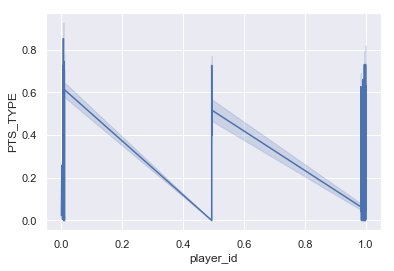

In [34]:
sns.set(style='darkgrid')
sns.lineplot(x='player_id',y='PTS_TYPE',data=data)

For the same value of player id there are two types of pts type. Hence, it is best to drop this feature.

Let's check how defender id effects the target.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


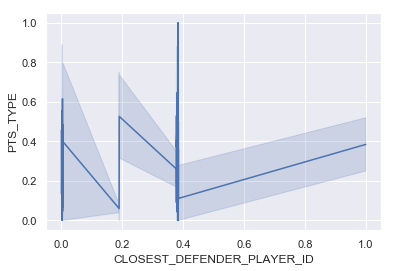

In [35]:
sns.set(style='darkgrid')
sns.lineplot(x='CLOSEST_DEFENDER_PLAYER_ID',y='PTS_TYPE',data=data)

Looks like some defenders have both types of pts type, i.e some defenders have 2 pointers and 3 pointers as a result. Hence, it's best to drop this feaure.

In [36]:
data.head()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,PTS,player_id,GAMECLOCK
0,0.726415,0.000000,0.000000,0.450000,0.06250,0.877984,0.0,0.0,0.189827,0.024436,0.666667,0.995515,0.095833
1,0.726415,0.027027,0.000000,0.141667,0.00000,0.872149,1.0,1.0,0.381628,0.114662,0.000000,0.995515,0.019444
2,0.726415,0.054054,0.000000,NaN,0.09375,0.882228,0.0,1.0,0.381628,0.016917,0.000000,0.995515,0.000000
3,0.726415,0.081081,0.166667,0.429167,0.06250,0.877984,0.0,1.0,0.383874,0.063910,0.000000,0.995515,0.981944
4,0.726415,0.108108,0.166667,0.454167,0.06250,0.882228,0.0,1.0,0.378683,0.020677,0.000000,0.995515,0.880556


We already know that there are missing values in 'SHOT_CLOCK'.
Let's check how many missing values it has.

In [37]:
data.isnull().sum()

FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
PTS                              0
player_id                        0
GAMECLOCK                        0
dtype: int64

There are 5567 missing values out of 128069 instances. So we can fill these datapoints with a mean value.

In [38]:
data.fillna(data.mean(),inplace=True)

Now let's check how 'SHOT_CLOCK' effects the target.

C:\Users\BATCOMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


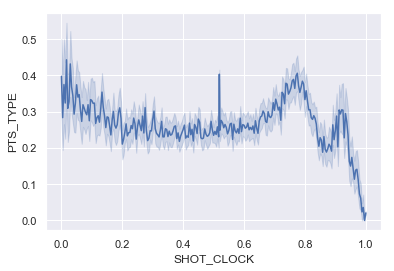

In [39]:
sns.set(style='darkgrid')
ax=sns.lineplot(x='SHOT_CLOCK',y='PTS_TYPE',data=data)

As shot clock decreases, chances of scoring a 2 pointer increases from 3 pointers for lower shot clock values.

Let's drop the above discussed features.

Let's drop 'PTS_TYPE' also since that is our target.

In [40]:
data_t = data.drop(['PTS_TYPE', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id'],axis=1)

In [41]:
data_t.head()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_RESULT,CLOSE_DEF_DIST,PTS,GAMECLOCK
0,0.726415,0.000000,0.000000,0.450000,0.06250,0.877984,0.0,0.024436,0.666667,0.095833
1,0.726415,0.027027,0.000000,0.141667,0.00000,0.872149,1.0,0.114662,0.000000,0.019444
2,0.726415,0.054054,0.000000,0.518889,0.09375,0.882228,1.0,0.016917,0.000000,0.000000
3,0.726415,0.081081,0.166667,0.429167,0.06250,0.877984,1.0,0.063910,0.000000,0.981944
4,0.726415,0.108108,0.166667,0.454167,0.06250,0.882228,1.0,0.020677,0.000000,0.880556


Convert the final dataset into an array since mathematical functions on arrays is faster.

In [42]:
data_t = np.array(data_t)

In [43]:
data_t

array([[0.72641509, 0.        , 0.        , ..., 0.02443609, 0.66666667,
        0.09583333],
       [0.72641509, 0.02702703, 0.        , ..., 0.11466165, 0.        ,
        0.01944444],
       [0.72641509, 0.05405405, 0.        , ..., 0.01691729, 0.        ,
        0.        ],
       ...,
       [0.3490566 , 0.16216216, 0.5       , ..., 0.07894737, 0.66666667,
        0.93055556],
       [0.3490566 , 0.18918919, 0.5       , ..., 0.05639098, 0.        ,
        0.21805556],
       [0.3490566 , 0.21621622, 0.5       , ..., 0.04323308, 0.66666667,
        0.01666667]])

In [44]:
data_t.shape

(128069, 10)

Create a target dataset now for prediction.

In [45]:
target = data['PTS_TYPE']
target.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: PTS_TYPE, dtype: float64

In [46]:
target.value_counts()

0.0    94173
1.0    33896
Name: PTS_TYPE, dtype: int64

0 = 2ptr

1 = 3ptr

Convert the target data into an array.

In [47]:
target=np.array(target)
target

array([0., 1., 0., ..., 0., 0., 0.])

In [48]:
target=target.reshape(-1,1)

In [49]:
target.shape

(128069, 1)

In [50]:
target

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Create training and test datasets.

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(data_t, target, test_size = 0.2)

In [52]:
model = Sequential([
    Dense(28, activation = 'relu', input_shape =(xtrain[1].shape)),
    Dense(16, activation = 'sigmoid'),
    Dense(2, activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                308       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________


Introduce callbacks like early stop to stop the calculation of validation accuracy if overfitting occurs, and learning rate reduction to reduce the learning rate automatically of accuracy is not improving.

In [54]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_acc', verbose=1, patience=10, mode='max')
learning = keras.callbacks.ReduceLROnPlateau(monitor = 'acc', verbose=1, patience=10, factor=0.1, mode='max', min_lr=0.001, cooldown = 5) 

In [55]:
# adam = keras.optimizers.adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [60]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size=512 ,verbose = 1,validation_split=0.2, callbacks = [early_stop, learning])

Train on 81964 samples, validate on 20491 samples
Epoch 1/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2497 - acc: 0.8770 - val_loss: 0.2497 - val_acc: 0.8788
Epoch 2/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2492 - acc: 0.8774 - val_loss: 0.2494 - val_acc: 0.8794
Epoch 3/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2491 - acc: 0.8777 - val_loss: 0.2492 - val_acc: 0.8783
Epoch 4/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2489 - acc: 0.8777 - val_loss: 0.2487 - val_acc: 0.8782
Epoch 5/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2484 - acc: 0.8778 - val_loss: 0.2499 - val_acc: 0.8742
Epoch 6/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2485 - acc: 0.8781 - val_loss: 0.2481 - val_acc: 0.8793
Epoch 7/10
81964/81964 [==============================] - 0s 3us/step - loss: 0.2477 - acc: 0.8781 - val_loss: 0.2476 - val_acc: 0.879

In [61]:
history.history

{'val_loss': [0.24968487107972206,
  0.24940927124007148,
  0.24915207040504214,
  0.24870764649831778,
  0.2499316172034085,
  0.24808423413020741,
  0.24763814561884573,
  0.24739075354752899,
  0.24714862945447363,
  0.24717030500671616],
 'val_acc': [0.8787760480356265,
  0.8794104729050815,
  0.8783368308183116,
  0.8781904250792066,
  0.8742374701233724,
  0.8793128690790114,
  0.8798496901223963,
  0.8784344346443816,
  0.8786296422965215,
  0.8773607925576118],
 'loss': [0.24971934220294154,
  0.24916204801270614,
  0.24909409872493424,
  0.24892579211851762,
  0.2483544142816899,
  0.24846763847705114,
  0.24772602451777867,
  0.2473886473613674,
  0.24714077894884637,
  0.2471791167186874],
 'acc': [0.8770313796446256,
  0.8774095944415585,
  0.8776902054589627,
  0.8777268068995566,
  0.8778488116676,
  0.8781416231661716,
  0.8780928212240484,
  0.8786418427486009,
  0.8786052413312776,
  0.8787516470558384],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0

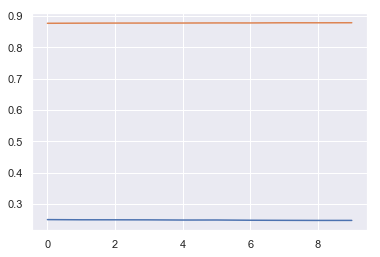

In [62]:
plt.plot(history.epoch, history.history['loss'],
        history.epoch, history.history['acc'])

Evaluate the accuracy on the test dataset.

In [63]:
model.evaluate(xtest, ytest)

25614/25614 [==============================] - 0s 14us/step


[0.24467685662062802, 0.8783087374185374]

Create a dataset for all the test data predicted values.

In [64]:
pred = model.predict(xtest, batch_size=None)

In [65]:
pred

array([[0.4464446 , 0.5535554 ],
       [0.5375294 , 0.4624706 ],
       [0.00290142, 0.99709857],
       ...,
       [0.53157616, 0.46842384],
       [0.9862076 , 0.01379235],
       [0.30533817, 0.6946618 ]], dtype=float32)

Create a list with all the predicted values for the test dataset.

In [66]:
counts = []
for i in range(len(pred)):
    counts.append(np.where(pred[i]==pred[i].max()))

In [67]:
count=[]
for i in range(len(counts)):
    count.append(counts[i][0][0])

Evaluate the accuracy on test dataset.

In [68]:
acc_count = 0
for i in range(len(count)):
    if ytest[i][0] == count[i]:
        acc_count += 1

In [69]:
acc_count/len(ytest)

0.8783087374092293

Check if some predicted values are equal to the actual output for the test dataset.

In [70]:
ytest[5]

array([1.])

In [71]:
np.where(pred[5]==pred[5].max())

(array([1], dtype=int64),)

In [72]:
ytest[2]

array([1.])

In [73]:
np.where(pred[2]==pred[2].max())

(array([1], dtype=int64),)